In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [66]:
print('Importing the dataset from google drive public with the help requests and StringIO packages. Reading the rawfile obtained with read_csv function of pandas.')
import requests
from io import StringIO
data_url='https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'

file_id = data_url.split('/')[-2]
download_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(download_url).text
csv_rawfile = StringIO(url)
data = pd.read_csv(csv_rawfile)
print(data.head())

Importing the dataset from google drive public with the help requests and StringIO packages. Reading the rawfile obtained with read_csv function of pandas.
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [67]:
print('Checking the data summary')
data.info()

Checking the data summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [68]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [69]:
data.shape

(150, 6)

In [70]:
print('Check for null/missing values in each column and return sum of total missing values in each column/feature')
print(data.isnull().sum())
print(data.isnull().values.any())

Check for null/missing values in each column and return sum of total missing values in each column/feature
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
False


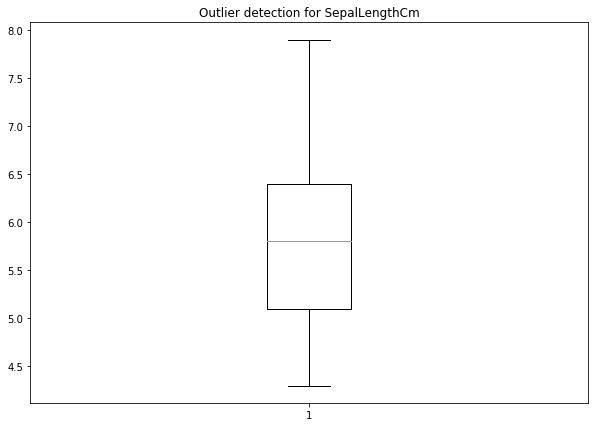

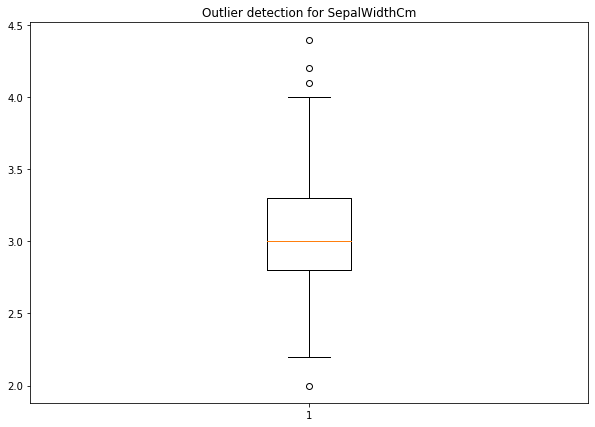

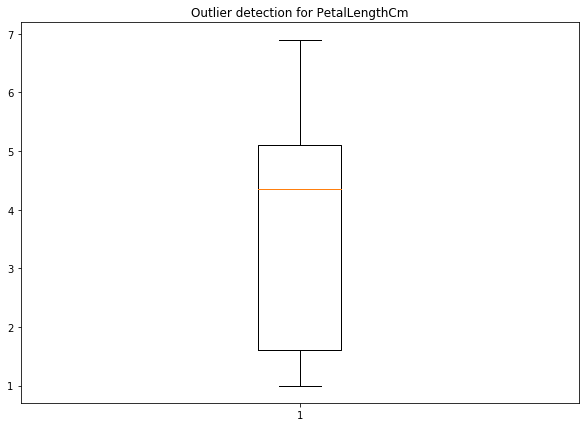

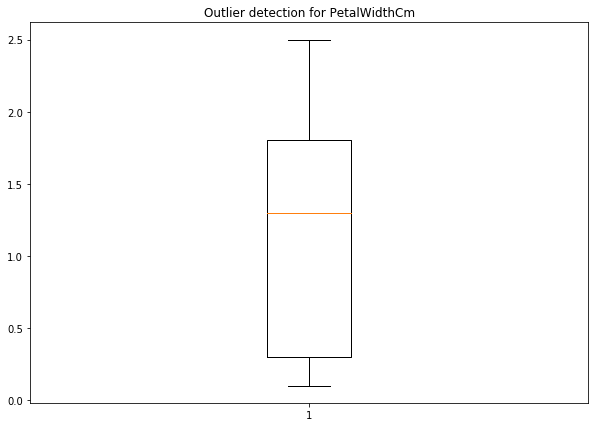

In [71]:
for feat in data.columns[1:5]:
    fig=plt.figure(figsize=(10,7))
    plt.boxplot(data[feat])
    plt.title(f'Outlier detection for {feat}')
    plt.show()

Now as per above observation, removing outlier data for SepalWidth as observed above


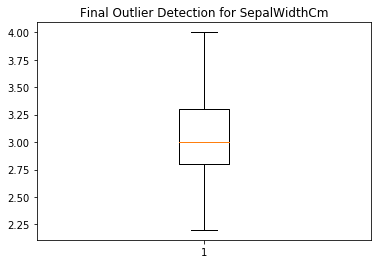

In [73]:
print('Now as per above observation, removing outlier data for SepalWidth as observed above')
q1=data.SepalWidthCm.quantile(0.25)
q3=data.SepalWidthCm.quantile(0.75)
iqr=q3-q1
low=q1-(1.5*iqr)
high=q3+(1.5*iqr)
data=data.loc[(data.SepalWidthCm>low)&(data.SepalWidthCm<high)]
plt.boxplot(data['SepalWidthCm'])
plt.title('Final Outlier Detection for SepalWidthCm')
plt.show()

In [74]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
print('Encode the target variable/attribute')
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})
data.head()

Encode the target variable/attribute


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [76]:
print('Preparing the data for training the decision tree classification model')
data.head()
X=data.drop(['Id','Species'],axis=1)
y=data.Species
print(X.head()) #predictor attributes data
print('\n\n The target feature : \n',y.head()) #target attribute data

Preparing the data for training the decision tree classification model
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


 The target feature : 
 0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [77]:
print('Now we proceed to build the Decision Tree model for classification')

Now we proceed to build the Decision Tree model for classification


In [78]:
print('Splitting the data into training and test data')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.25)

Splitting the data into training and test data


In [79]:
print('Building classifier first with criterion : Gini index \n')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
Dtree=DecisionTreeClassifier(criterion = "gini", random_state = 100,max_leaf_nodes=12)
Dtree
print('Fitting the classifier with training data')
Dtree.fit(X_train,y_train) #fit the data in Decision Tree Classifier model created
print('Predict species on test data')
y_predicted=Dtree.predict(X_test)
print(y_predicted)
print('Accuracy of prediction with respect to test data is :', f'{accuracy_score(y_test,y_predicted)*100} %')

Building classifier first with criterion : Gini index 

Fitting the classifier with training data
Predict species on test data
[0 2 1 0 0 1 2 2 0 2 0 0 0 1 1 0 0 2 0 0 1 1 0 0 2 1 1 0 0 0 0 1 1 1 2 2 2]
Accuracy of prediction with respect to test data is : 91.8918918918919 %


In [80]:
print('Building classifier next with criterion : Entropy \n')
Dtree1=DecisionTreeClassifier(criterion = "entropy", random_state = 123,max_leaf_nodes=12)
Dtree1.fit(X_train,y_train) #fit the data in Decision Tree Classifier model created
print('Predict species on test data')
y_predicted1=Dtree1.predict(X_test)
print(y_predicted1)
print('Accuracy of prediction with respect to test data is :', f'{accuracy_score(y_test,y_predicted1)*100} %')

Building classifier next with criterion : Entropy 

Predict species on test data
[0 2 1 0 0 1 1 2 0 2 0 0 0 1 1 0 0 2 0 0 1 1 0 0 2 1 1 0 0 0 0 1 1 1 2 2 2]
Accuracy of prediction with respect to test data is : 89.1891891891892 %


In [87]:
print('We observe that Accuracy with criterion = gini is better than the accuracy with criterion = entropy')
print('Accuracy with Gini = 91.8%')
print('Accuracy with Entropy = 89.1%')

We observe that Accuracy with criterion = gini is better than the accuracy with criterion = entropy
Accuracy with Gini = 91.8%
Accuracy with Entropy = 89.1%


In [88]:
print('Consider Prunning in order to avoid overfitting of the tree.')
#Find the optimum value of 'max_depth' that gives me the maximum accuracy with respect to 'gini' & 'entropy',which we can compare
#for chosing the best fit criterion along with the depth of the tree, for maximum accuracy and avoid overfitting

gini_accuracy=[]
entropy_accuracy=[]
tree_depth=[]
for i in range(1,30):
    Dtree=DecisionTreeClassifier('entropy',max_depth=i,random_state=123,max_leaf_nodes=12)
    Dtree.fit(X_train,y_train)
    y_pred_ent=Dtree.predict(X_test)
    entropy_accuracy.append(accuracy_score(y_test,y_pred_ent))
    Dtree2=DecisionTreeClassifier('gini',max_depth=i,random_state=456,max_leaf_nodes=12)
    Dtree2.fit(X_train,y_train)
    y_pred_gini=Dtree2.predict(X_test)
    gini_accuracy.append(accuracy_score(y_test,y_pred_gini))
    tree_depth.append(i)
gini_accuracy  

comparison_data = pd.DataFrame({'gini_accuracy':pd.Series(gini_accuracy),'entropy_accuracy':pd.Series(entropy_accuracy),'Max_depth':pd.Series(tree_depth)})
comparison_data.head()

Consider Prunning in order to avoid overfitting of the tree.


,gini_accuracy,entropy_accuracy,Max_depth
0,0.459459,0.675676,1
1,0.891892,0.918919,2
2,0.945946,0.918919,3
3,0.945946,0.891892,4
4,0.945946,0.891892,5


Visualizing changes in Accuracy of prediction based on max_depth parameter


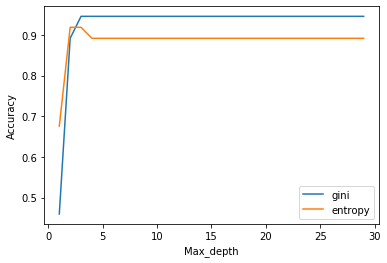

In [89]:
print('Visualizing changes in Accuracy of prediction based on max_depth parameter')
plt.plot('Max_depth','gini_accuracy', data=comparison_data, label='gini')
plt.plot('Max_depth','entropy_accuracy', data=comparison_data, label='entropy')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [90]:
print('We observe that Accuracy for blue line is higher than that of yellow line. ')
print('Accuracy is highest for the blue line at Max_depth = 4')
print('Therefore we use the criterion = gini index,max_depth = 4 for building the final decision tree classifier')

We observe that Accuracy for blue line is higher than that of yellow line. 
Accuracy is highest for the blue line at Max_depth = 4
Therefore we use the criterion = gini index,max_depth = 4 for building the final decision tree classifier


In [92]:
print('Gini index is used as splitting criterion while selecting feature in each iteration.Feature with lowest gini index is selected in each split.')
Dtree=DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4,max_leaf_nodes=12)

Gini index is used as splitting criterion while selecting feature in each iteration.Feature with lowest gini index is selected in each split.


In [100]:
Dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [101]:
print('Fitting the classifier with training data')
Dtree.fit(X_train,y_train) #fit the data in Decision Tree Classifier model created

Fitting the classifier with training data


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [102]:
#predicting the probability of each class to be obtained for the test data.
Dtree.predict_proba(X_test)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [103]:
print('Predict species on test data')
y_predicted=Dtree.predict(X_test)
print(y_predicted)

Predict species on test data
[0 2 1 0 0 1 1 2 0 2 0 0 0 1 1 0 0 2 0 0 1 1 0 0 2 1 1 0 0 0 0 1 1 1 2 2 2]


Checking for visualization of the decision tree classification to have a better understanding --- 


Decision Tree formed once the model is trained with training data :


[Text(167.40000000000003, 195.696, 'X[3] <= 1.75\ngini = 0.661\nsamples = 109\nvalue = [30, 41, 38]'),
 Text(66.96000000000001, 152.208, 'X[3] <= 0.8\ngini = 0.517\nsamples = 72\nvalue = [30, 40, 2]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 7.1\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 1.65\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(33.480000000000004, 21.744, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(100.44000000000001, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.92000000000002, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 152.208, 'X[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 108.72, 'X[0] <= 6.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.

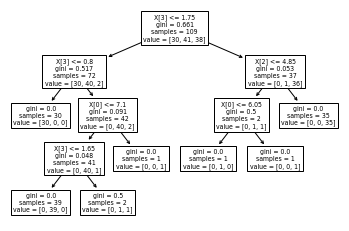

In [104]:
print('Checking for visualization of the decision tree classification to have a better understanding --- \n\n')
print('Decision Tree formed once the model is trained with training data :')
from sklearn import tree
tree.plot_tree(Dtree)

Plotting the Decision Tree for better visualization


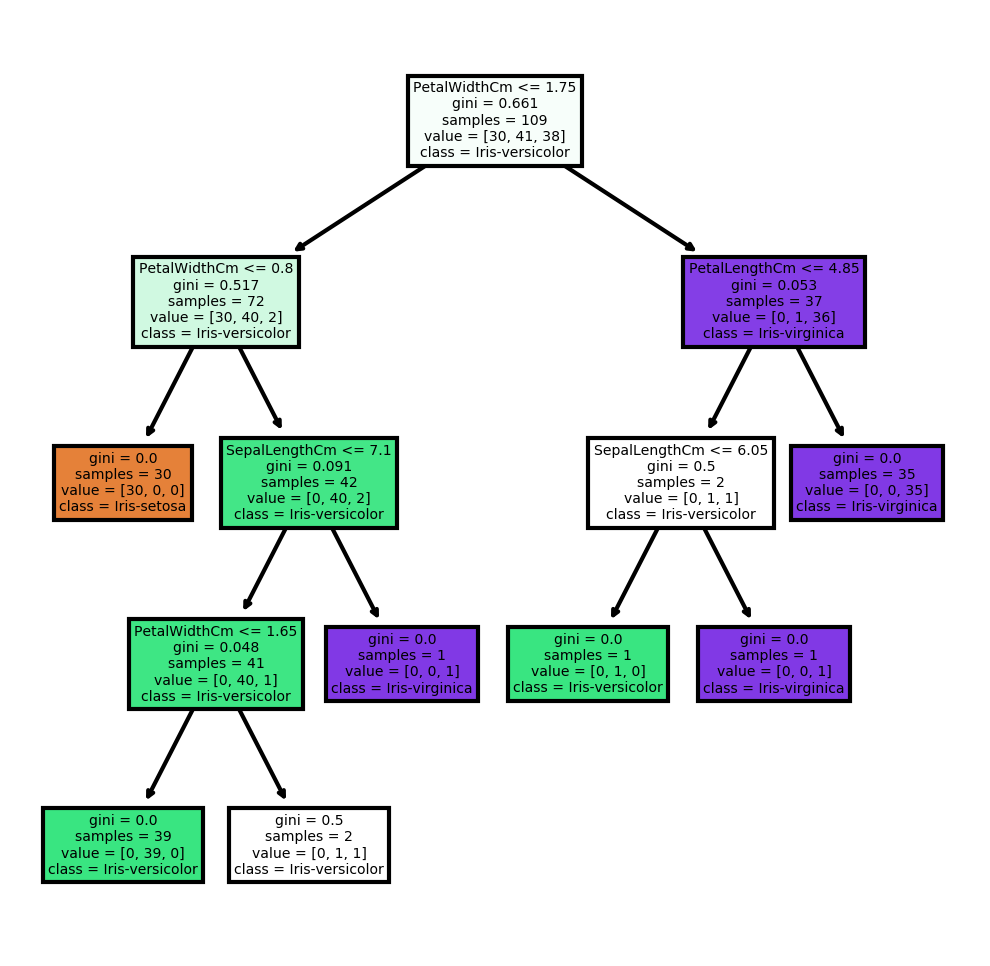

In [106]:
print('Plotting the Decision Tree for better visualization')
from matplotlib import pyplot as plt
fn=data.columns[1:5]
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(Dtree,feature_names = fn, class_names=cn,filled = True);
fig.savefig('imagename.png')

In [109]:
print('Checking the accuracy of prediction for final Decision Tree Classifier')
print('Confusion matrix of the y_test and y_predicted for final classifier:', confusion_matrix(y_test,y_predicted))
print('Accuracy of prediction for the final classifier with respect to test data is :', f'{accuracy_score(y_test,y_predicted)*100} %')


Checking the accuracy of prediction for final Decision Tree Classifier
Confusion matrix of the y_test and y_predicted for final classifier: [[17  0  0]
 [ 0  8  0]
 [ 0  4  8]]
Accuracy of prediction for the final classifier with respect to test data is : 89.1891891891892 %
